In [2]:
import pandas as pd
kofia = pd.read_csv("../kofia_issuance.csv")
kofia.shape, kofia.columns

C:\Users\DYK\AppData\Local\Temp\ipykernel_11192\1884788684.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  kofia = pd.read_csv("../kofia_issuance.csv")


((203492, 37),
 Index(['종목명', '표준코드', '채권종류', '발행일', '만기일', '기간', '신용등급', '상장구분', '상장일',
        '선매출유형', '선매출일', '발행옵션', '발행금액', '발행금액_단위', '발행금액_flag', '발행잔액',
        '발행잔액_단위', '원금거치기간', '분할상환회수(회)', '이자지급유형', '만기상환율(%)', '이자계산주기(월)',
        '주관회사', '표면금리(%)', '등록기관', '할인율(%)', '원리금지급기관', '이자지급 선/후급', '보증기관',
        '보증형태', 'FRN 가산금리(%)', 'FRN 금리(%)', 'val50', 'val51', 'val52', 'val53',
        'flag'],
       dtype='object'))

"위탁관리부동산투자회사" 뉘앙스 종목명이 정말 회사채일까? 아니면 ABS일까?

In [3]:
t = kofia["종목명"].value_counts()
print(t.shape[0]/kofia.shape[0])

0.9983193442494054


In [4]:
import re

def check_bracket(s):
    if s:
        stack = []
        for c in s:
            if c == "(":
                stack.append(c)
            elif c == ")":
                if stack:
                    stack = []
        return len(stack) == 0
    return None


def extract_bracket(text):
    matches = re.findall(r'\((.*?)\)', re.sub(r'-|\d+', '', text).replace("()", ""))
    return '|'.join(matches) if matches else None

check_bracket("2010신보뉴첼린지건설1호유동화1-2(사모/후")

False

In [5]:
import re

def is_hangul_left_of_ji(text):
    # '지'가 있는 위치를 찾습니다
    match = re.search(r'지', text)
    
    # '지'가 문자열에 존재하는지 확인하고, 첫 번째 문자의 경우를 제외합니다
    if match and match.start() > 0:
        # '지' 앞의 문자를 가져옵니다
        prev_char = text[match.start() - 1]
        
        # 한글 범위(유니코드: 0xAC00 ~ 0xD7A3) 안에 있는지 확인합니다
        return '가' <= prev_char <= '힣'
    return False

# 테스트 예시
text = "지안녕하세요지"
print(is_hangul_left_of_ji(text))  # True


False


In [95]:
# 괄호 없이 도시공사보상은 보상 채권일까나...?

# 경기주택도시공사보상24-06가	KR353602DE66	2024-06-30	2027-06-30	특수채
# 경기주택도시공사보상24-06다	KR353601DE67	2024-06-30	2029-06-30	특수채
# 경기주택도시공사보상24-07가	KR353601DE75	2024-07-31	2027-07-31	특수채
# 경기주택도시공사보상24-08가	KR353601DE83	2024-08-31	2027-08-31	특수채
# 경기주택도시공사보상24-09가	KR353601DE91	2024-09-30	2027-09-30	특수채
# 경남개발공사(보상) (산청)17-04	KR355001D748	2017-04-30	2020-04-30	특수채
# 경남개발공사(보상) (산청)17-05	KR355001D755	2017-05-31	2020-05-31	특수채
# 경남개발공사(보상) (서김해)15-01	KR355001D516	2015-01-31	2018-01-31	특수채
# 경남개발공사(보상) (서김해)15-02	KR355002D522	2015-02-28	2018-02-28	특수채
# 경남개발공사(보상) (서김해)15-03	KR355001D532	2015-03-31	2018-03-31	특수채


In [96]:
# 합
# 산금채 26개, 한국정책금융공사 1개
# 산금채02합이0300-01-17	KR3102047N18	은행채	2002-01-17	2005-01-17	-	무보증
# 산금채02합이0300-03-27	KR3102117N39	은행채	2002-03-27	2005-03-27	-	무보증
# 산금채02합이0300-07-11	KR3102047N75	은행채	2002-07-11	2005-07-11	-	무보증
# 산금채02합이0300-10-09	KR3102047NA8	은행채	2002-10-09	2005-10-09	-	무보증
# 한국정책금융공사11합이0300-0408	KR3562027143	2011-04-08


# 가능성 1: 통합 발행
# "합"은 여러 개의 소규모 발행물이나 차수로 나눠진 채권들을 하나로 통합한 것을 의미할 수 있습니다. 즉, 해당 발행물을 여러 차례 발행했지만 발행 조건이나 이자율이 동일한 경우, 이를 "합"으로 통합하여 관리하는 방식일 수 있습니다.

# 가능성 2: 채권 종류 또는 차수 통합
# "합"이라는 용어는 채권 발행에서 같은 시기나 조건으로 발행된 채권을 묶는 용어일 가능성도 있습니다. 같은 조건으로 여러 차례 발행되었을 때, 이를 묶어 산금채02합이라는 식으로 부르는 경우입니다.

In [97]:
# 영구채: 만기일에 표시되어 있음!!!

option_flag = ("PB", "BW", "PCBO사모", "CBO사모", "사모전환", "유동화", "MBS", "사모", "용지보상",
"행사", "CB", "전환", "교환", "EB", "신종", "구조", "조기상환", "INT", "INTI", # international 
"분리신", "분신", "콜", "풋",  "call", "CALL", "PUT", "Put", "Call", "put", "이중상환",
 "조건상각", "조건전환", "강제", "변동", "FRN", "변",  "전", "SLB", "혁신", "녹","담보", "담보부", 
 "보상", "후순위", "후", "중", "신" , "엔", "엔화", "$","USD", "교", "지", "사", "외", "합")



# TODO:
# ESG OPTION: "녹", "혁신"==SLB
# 담보: "담보", "담보부", "보상",
# 순서: "후순위", "후", "중", "선",

# 단순 채권 == 무보증, 무담보채권?

# 단?:  vs 단리(은행채에만 있음)
# 갤러리케이 1PB(단순),KR6483131E66,2024-06-12,2025-06-12,단순
# 갤러리케이 1PB(단순),KR6483131E74,2024-07-02,2025-07-02,단순
# 온공투드라마세자 1PB(단순),KR6476911E33,2024-03-20,2026-03-20,단순
# 온공투드라마완결정 1PB(단순),KR6467951DA4,2023-10-25,2025-04-25,단순
# 중금채(구조) 1412단리15B-5(콜),KR310501J4C8,2014-12-05,2029-12-05,구조|콜
# 중금채(구조) 1501 단15A-20(콜),KR310502J514,2015-01-20,2030-01-20,구조|콜
# 중금채(구조) 1501 단리 15A-15(콜),KR310501J516,2015-01-15,2030-01-15,구조|콜
# 한국씨티은행 19-06단리20A(콜),KR6016831564,2015-06-24,2035-06-24,콜
# 한국씨티은행 19-10단리20-A(콜),KR60168315A4,2015-10-26,2035-10-26,콜

# 외전?: 경남리스금융130-외전(풋,KR3314014H73,1997-07-01,2000-07-01,외전풋
# 조흥리스금융152-외전,KR3310037H41,1997-04-24,2000-04-24,외전
# 경인양행4-외전,KR6012614H66,1997-06-23,2000-12-28,외전
# 유니온11-외전,KR6000918H56,1997-05-08,2000-05-08,외전

# PB: 아마도 Private Bond?

regex = {
    "contain":  rf'\b({"|".join(option_flag)})\b',
    "remove": r"\(.*?\)",
    "last": r"(" + "|".join(re.escape(v) for v in option_flag) + r")$",
    "letter": r"[^a-zA-Z가-힣]",
}

In [98]:
is_hangul_left_of_char = lambda text, char, not_chars=[]: \
    text and any('가' <= text[i - 1] <= '힣' \
         for i in range(1, len(text)) \
            if (text[i] == char) and text[i - 1] not in not_chars)

In [99]:
kofia[kofia.종목명.str.contains("혁신")]

,종목명,표준코드,발행일,만기일,채권종류,신용등급,상장구분,상장일,선매출유형,선매출일,...,보증형태,FRN 가산금리(%),FRN 금리(%),val50,val51,val52,val53,발행금액_flag,기간,flag
12984,광주도시공사보상(혁신)07-10,KR3524014TA5,2007-10-31,2010-10-31,특수채,AA+,소멸/페지,2007-10-11,해당없음,0000-00-00,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1096,NaN
12985,광주도시공사보상(혁신)07-11,KR3524014TB3,2007-11-30,2010-11-30,특수채,-,소멸/페지,2007-11-01,해당없음,0000-00-00,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1096,NaN
12986,광주도시공사보상(혁신)07-12,KR3524014TC1,2007-12-31,2010-12-31,특수채,-,소멸/페지,2007-12-03,해당없음,2007-12-04,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1096,NaN
12987,광주도시공사보상(혁신)08-01,KR3524014V12,2008-01-31,2011-01-31,특수채,AA+,소멸/페지,2008-01-02,해당없음,0000-00-00,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1096,NaN
12988,광주도시공사보상(혁신)08-02,KR3524014V20,2008-02-29,2011-02-28,특수채,-,소멸/페지,2008-02-01,매출시,0000-00-00,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1095,선매출
12989,광주도시공사보상(혁신)08-03,KR3524014V38,2008-03-31,2011-03-31,특수채,-,소멸/페지,2008-03-03,매출시,0000-00-00,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1095,선매출
12990,광주도시공사보상(혁신)08-04,KR3524014V46,2008-04-30,2011-04-30,특수채,-,유가증권시장,2008-04-01,해당없음,0000-00-00,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,Zero,1095,NaN
54877,부산도시공사(문현혁신도시)11-12,KR61046841C1,2011-12-31,2014-12-31,회사채,-,소멸/페지,0000-00-00,해당없음,0000-00-00,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1096,NaN
126332,전남개발공사보상(혁신)07-10,KR3551014TA1,2007-10-31,2010-10-31,특수채,무등급,소멸/페지,2007-10-26,매출시,0000-00-00,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1096,선매출
126333,전남개발공사보상(혁신)07-11,KR3551014TB9,2007-11-30,2010-11-30,특수채,-,소멸/페지,2007-11-01,매출시,2007-11-30,...,무보증,NaN,NaN,12.0,51.0,62.0,36.000000,NaN,1096,선매출


In [100]:
kofia["flag"] = None
kofia["종목명_temp"] = kofia["종목명"].apply(
    lambda x: re.sub(r"\(주\)|option|\d", "", x)).str.strip()
kofia["flag"] = kofia["종목명_temp"].apply(extract_bracket)
kofia["flag"] = kofia["flag"].apply(
    lambda x: x if (x and re.search(regex["contain"], x)) else None)
kofia["종목명_temp"] = kofia["종목명_temp"].apply(
    lambda x: re.sub(regex["remove"], "", x).replace(")","")).str.strip()
kofia.loc[kofia["flag"].isna(), "flag"] = kofia[kofia["flag"].isna()]["종목명_temp"].apply(
    lambda x: x.split("-")[-1] if x and x.split("-")[-1] in option_flag else None)


kofia.loc[kofia["flag"].isna(), "flag"] = kofia[kofia["flag"].isna()]["종목명_temp"].apply(
    lambda x: re.sub(regex["letter"], "", x[-4:]) if x and any(x[-len(v):]==v for v in option_flag) else None)

kofia.loc[(kofia["flag"].isna()) & (kofia["채권종류"].isin(["은행채", "기타금융채", "특수채"])),"flag"] = kofia[
    (kofia["flag"].isna()) & (kofia["채권종류"].isin(["은행채","기타금융채","특수채"]))]["종목명_temp"].apply(
        lambda x:  "|".join(v for i, v in enumerate("변후신") if v in x[3:]) 
        if x and any(v in x[1:] for v in "변후신")  else None 
    ) # "신"과 "신한은행"ㅠ 그래서 x가 아닌 x[1:]로 함

kofia["flag"] = kofia["flag"].apply(lambda x: None if x == "" else x)

for v in ("유동화", "MBS"):
    kofia.loc[(kofia["flag"].isna()) & kofia["종목명_temp"].str.contains(v), "flag"] = v
    

del kofia["종목명_temp"]

kofia.loc[(kofia["flag"]=="신") & (kofia["종목명"].str.contains("여신", na=False)), "flag"] = None
kofia.loc[(kofia["flag"].notna()) & (kofia["flag"].apply(is_hangul_left_of_char, char="합")), "flag"] = None
kofia.loc[(kofia["flag"].notna()) & (kofia["flag"].apply(is_hangul_left_of_char, char="엔")), "flag"] = None
kofia.loc[(kofia["flag"].notna()) & (kofia["flag"].apply(is_hangul_left_of_char, char="지", not_chars=["용"])), "flag"] = None
kofia.loc[(kofia["flag"].notna()) & (kofia["flag"].apply(is_hangul_left_of_char, char="전", not_chars=["모"])), "flag"] = None # 사모전환
kofia.loc[(kofia["flag"].notna()) & (kofia["flag"].apply(is_hangul_left_of_char, char="사", not_chars=["행","O"])), "flag"] = None # 행사, CBO사모
kofia.loc[(kofia["flag"].notna()) & (kofia["flag"].apply(is_hangul_left_of_char, char="신", not_chars=["리","분", "혁"])), "flag"] = None # 분리신, 분신, 혁신


# 다행히도 보상 단어 포함 시 '혁신' 말고 다른 옵션명이 종목명에 보이진 않음^^
kofia.loc[(kofia["flag"].notna()) & (~kofia["flag"].str.contains(r"용지", na=False))& \
    (~kofia["flag"].str.contains(r"보상", na=False)) & (kofia["종목명"].str.contains(r"도시공사|개발공사")), "flag"] = None

kofia.loc[(kofia["flag"].isna()) & (kofia["발행옵션"]=="옵션부"), "flag"] = "옵션부"
kofia.loc[(kofia["flag"].isna()) & (kofia["만기일"]=="9999-12-31"), "flag"] = "영구채"
kofia.loc[(kofia["flag"].isna()) & ((kofia["분할상환회수(회)"]!="-") | (kofia["분할상환회수(회)"].isna())), "flag"] = "분할상환"
kofia.loc[(kofia["flag"].isna()) & (kofia["보증형태"].isin(["보증","담보부","-"])), "flag"] = "보증|담보"
kofia.loc[(kofia["flag"].isna()) & ((~kofia["FRN 가산금리(%)"].isna()) | (~kofia["FRN 금리(%)"].isna())), "flag"] = "FRN"
kofia.loc[(kofia["flag"].isna()) & (kofia["선매출유형"].isin(["상환시", "매출시", "최초이자지급시"])), "flag"] = "선매출"
kofia.loc[(kofia["flag"].isna()) & (kofia["채권종류"]=="ABS"), "flag"] = "ABS"
kofia.loc[(kofia["flag"].isna()) & (kofia["발행금액_단위"]!="억원"), "flag"] = "외환" # 20 rows
kofia.loc[(kofia["flag"].isna()) & (kofia.종목명.str.contains("원화표시")), "flag"] = "원화표시채권" # 3 rows
# https://www.seoul.co.kr/news/newsView.php?id=19950825017005

kofia.loc[(kofia["flag"].isna()) & (kofia.종목명.str.contains("SLB")), "flag"] = "SLB"

for v in ["국민카드", "은행", "중앙회"]:
    kofia[kofia["flag"]==v]["flag"]=None

kofia[kofia.종목명.str.contains("\(혁신")]["flag"]="혁신"

print(kofia["flag"].isna().sum())
kofia[~kofia["flag"].isna()][[
    "종목명", "표준코드", "채권종류", "발행일", "만기일", '분할상환회수(회)', 
    "보증형태", "발행옵션", "FRN 가산금리(%)", "FRN 금리(%)", "발행금액_단위",
    "선매출유형", "flag"]].to_csv("notStraight.csv", index=False)

C:\Users\DYK\AppData\Local\Temp\ipykernel_7564\617250196.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kofia[kofia["flag"]==v]["flag"]=None
C:\Users\DYK\AppData\Local\Temp\ipykernel_7564\617250196.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kofia[kofia.종목명.str.contains("\(혁신")]["flag"]="혁신"


74321


In [101]:
kofia[kofia["flag"].isna()][kofia.종목명.str.contains("합")][kofia.채권종류 == "지방채"].종목명.unique().tolist()

C:\Users\DYK\AppData\Local\Temp\ipykernel_7564\3829686195.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kofia[kofia["flag"].isna()][kofia.종목명.str.contains("합")][kofia.채권종류 == "지방채"].종목명.unique().tolist()
C:\Users\DYK\AppData\Local\Temp\ipykernel_7564\3829686195.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kofia[kofia["flag"].isna()][kofia.종목명.str.contains("합")][kofia.채권종류 == "지방채"].종목명.unique().tolist()


['대구종합경기장건설1', '대구종합경기장건설2', '대구종합경기장건설3', '대구종합경기장건설4']

In [102]:
kofia[kofia.종목명.str.contains("합")]

,종목명,표준코드,발행일,만기일,채권종류,신용등급,상장구분,상장일,선매출유형,선매출일,...,보증형태,FRN 가산금리(%),FRN 금리(%),val50,val51,val52,val53,발행금액_flag,기간,flag
4156,LG종합금융94-12,KR6008814EC4,1994-12-26,1997-12-26,회사채,무등급,유가증권시장,1995-02-02,-,0000-00-00,...,무보증,NaN,NaN,3.0,53.0,61.0,36.0,NaN,1096,None
4157,LG종합금융95-10,KR6008814FA5,1995-10-16,1998-10-16,회사채,무등급,유가증권시장,1995-11-11,-,0000-00-00,...,무보증,NaN,NaN,3.0,53.0,61.0,36.0,NaN,1096,None
4158,LG종합금융95-11,KR6008814FB3,1995-11-13,1998-11-13,회사채,무등급,유가증권시장,1995-11-29,-,0000-00-00,...,무보증,NaN,NaN,3.0,53.0,61.0,36.0,NaN,1096,None
4159,LG종합금융95-12,KR6008814FC1,1995-12-11,1998-12-11,회사채,무등급,유가증권시장,1996-01-06,-,0000-00-00,...,무보증,NaN,NaN,3.0,53.0,61.0,36.0,NaN,1096,None
4160,LG종합금융95-2,KR6008814F23,1995-02-13,1998-02-13,회사채,무등급,유가증권시장,1995-02-28,-,0000-00-00,...,무보증,NaN,NaN,3.0,53.0,61.0,36.0,NaN,1096,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202017,황보종합건설1(콜),KR6155301239,2012-03-28,2015-03-28,회사채,-,예탁지정,0000-00-00,해당없음,2012-03-28,...,무보증,NaN,NaN,3.0,51.0,62.0,36.0,NaN,1095,콜
202068,효산종합건설1(PCBO사모/콜),KR6401771B90,2021-09-28,2024-09-28,회사채,-,예탁지정,0000-00-00,해당없음,2021-09-28,...,무보증,NaN,NaN,3.0,51.0,62.0,36.0,NaN,1096,PCBO사모/콜
203022,효양종합건설1(사모/콜),KR6162111290,2012-09-06,2015-09-06,회사채,-,소멸/페지,0000-00-00,해당없음,2012-09-06,...,무보증,NaN,NaN,3.0,51.0,62.0,36.0,NaN,1095,사모/콜
203077,훼미리종합건설1(PCBO사모/콜),KR6351551A37,2020-03-26,2023-03-26,회사채,-,예탁지정,0000-00-00,해당없음,2020-03-26,...,무보증,NaN,NaN,3.0,51.0,62.0,36.0,NaN,1095,PCBO사모/콜


In [103]:
kofia[kofia["flag"].isna()][[
    "종목명", "표준코드", "채권종류", "발행일", "만기일", '분할상환회수(회)', 
    "보증형태", "발행옵션", "FRN 가산금리(%)", "FRN 금리(%)", "발행금액_단위",
    "선매출유형", "flag"]].to_csv("Straight.csv", index=False)

In [104]:
kofia.loc[kofia["flag"].notna()].flag.value_counts().index.tolist()

['사모/콜',
 '사모',
 '유동화',
 '보증|담보',
 'PCBO사모/콜',
 '선매출',
 '콜',
 '신',
 'FRN',
 '변',
 '사모|콜',
 '사모/전환/풋',
 '후',
 '강제',
 '사',
 'PCBO사모',
 '사모/전/풋',
 '전',
 '사|콜',
 'MBS',
 '용지',
 '단',
 '콜/풋',
 'ABS',
 '사모/분리신/풋',
 '사모/풋',
 '은행',
 '콜/후',
 '사모/전',
 'call',
 '사모/강제',
 '변/콜',
 '사모/콜/강제',
 '사모/후',
 '전/풋',
 '지',
 '녹',
 '사모/변',
 '정금',
 '사모/콜/후',
 '분리신/풋',
 '옵션부',
 '콜/강제',
 '사모/전환/단순',
 '콜/변',
 '사모/교환/풋',
 '사모/콜/풋',
 '변/$',
 '정금채',
 '사모/전/콜/풋',
 '변|변',
 '중앙회',
 '사모/분신/풋',
 '사|사모/후',
 '사모/콜/변',
 '풋',
 '사모/신/풋',
 '사모/교/풋',
 '구조|콜',
 'call&put',
 '후순위',
 '사모|분리신/풋',
 '사모/분리신',
 '분할상환',
 '전환',
 '사모/전환/콜/풋',
 '사모/전환',
 '사모/분리신/콜/풋',
 '변동',
 '$|변',
 '신|사',
 '단순',
 '사모/분신/콜/풋',
 'put',
 '정금|INTN|콜',
 '변/엔',
 'INTN/콜',
 '구조|콜/변',
 '콜/중',
 '경제',
 '콜|콜/변',
 'call/put',
 '엔/사모/분리신/풋',
 '사모/분리/풋',
 '상|조건상각/콜/후',
 '콜/단순',
 '사모/교',
 '콜/풋/후',
 '지|강제',
 '후|콜/후',
 '국민카드',
 '전/콜/풋',
 '상|후',
 '$/변',
 '은행|변동',
 '사모/put',
 '사모/교환',
 '후|후',
 '보상',
 '사모/전/콜',
 '분리신',
 '중기',
 '도로',
 '은행|후',
 '분신/풋',
 'INTN/변',
 'CALL',
 '엔

In [106]:
(kofia[kofia["발행옵션"]=="옵션부"]["채권종류"].value_counts().sort_index() / kofia.shape[0] * 100).round(3)

채권종류
ABS       4.930
기타금융채     0.159
은행채       0.829
지방채       0.001
특수채       1.238
회사채      18.616
Name: count, dtype: float64

In [107]:
kofia[kofia["flag"].str.contains("신", na=False)].to_excel("sin.xlsx", engine="openpyxl", index=False)

In [108]:
kofia['보증형태'].value_counts(dropna=False)

보증형태
무보증    172057
일반      18017
보증      13325
담보부        87
-           6
Name: count, dtype: int64

In [109]:
kofia[(kofia["분할상환회수(회)"] != "-") & (~kofia["분할상환회수(회)"].isna()) & (kofia["flag"].isna())][[
    "분할상환회수(회)", "종목명", "표준코드",  "발행일", "만기일", "발행옵션", "보증형태", "FRN 가산금리(%)", "FRN 금리(%)", "flag"]].to_csv("ahhhhh.csv", index=False)

In [110]:
kofia.columns

Index(['종목명', '표준코드', '발행일', '만기일', '채권종류', '신용등급', '상장구분', '상장일', '선매출유형',
       '선매출일', '발행옵션', '발행금액', '발행금액_단위', '원금거치기간', '발행잔액', '발행잔액_단위',
       '분할상환회수(회)', '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '표면금리(%)',
       '등록기관', '할인율(%)', '원리금지급기관', '이자지급 선/후급', '보증기관', '보증형태', 'FRN 가산금리(%)',
       'FRN 금리(%)', 'val50', 'val51', 'val52', 'val53', '발행금액_flag', '기간',
       'flag'],
      dtype='object')

In [111]:
kofia[kofia["flag"].isna()][kofia["종목명"].str.contains("PB")].head()

C:\Users\DYK\AppData\Local\Temp\ipykernel_7564\1006495691.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kofia[kofia["flag"].isna()][kofia["종목명"].str.contains("PB")].head()


,종목명,표준코드,발행일,만기일,채권종류,신용등급,상장구분,상장일,선매출유형,선매출일,...,보증형태,FRN 가산금리(%),FRN 금리(%),val50,val51,val52,val53,발행금액_flag,기간,flag


In [112]:
(kofia[kofia["flag"].isna()]["채권종류"].value_counts().sort_index() / kofia.shape[0] * 100).round(3)

채권종류
국채         0.735
기타금융채     13.217
은행채        7.649
지방채        3.580
통화안정증권     1.543
특수채        3.730
회사채        6.070
Name: count, dtype: float64

In [113]:
(kofia[kofia["발행옵션"]=="옵션부"]["채권종류"].value_counts().sort_index() / kofia.shape[0] * 100).round(3)

채권종류
ABS       4.930
기타금융채     0.159
은행채       0.829
지방채       0.001
특수채       1.238
회사채      18.616
Name: count, dtype: float64

In [114]:
(kofia[kofia["flag"].isna()]["채권종류"].value_counts().sort_index() / kofia.shape[0] * 100).round(3)

채권종류
국채         0.735
기타금융채     13.217
은행채        7.649
지방채        3.580
통화안정증권     1.543
특수채        3.730
회사채        6.070
Name: count, dtype: float64

In [116]:
t = kofia[kofia["flag"].isna()]["채권종류"].value_counts().sort_index() / kofia.shape[0] * 100
print(t[["기타금융채", "은행채", "회사채"]].sum())
t

26.935702632044503


채권종류
국채         0.734673
기타금융채     13.216736
은행채        7.648949
지방채        3.579502
통화안정증권     1.542567
특수채        3.730368
회사채        6.070017
Name: count, dtype: float64

In [142]:
kofia[[
    '종목명', '표준코드', '채권종류', '발행일', '만기일', '기간',  '신용등급', '상장구분', '상장일', '선매출유형',
       '선매출일', '발행옵션', '발행금액', '발행금액_단위',  '발행금액_flag',  '발행잔액', '발행잔액_단위', '원금거치기간',
       '분할상환회수(회)', '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '표면금리(%)',
       '등록기관', '할인율(%)', '원리금지급기관', '이자지급 선/후급', '보증기관', '보증형태', 'FRN 가산금리(%)',
       'FRN 금리(%)', 'val50', 'val51', 'val52', 'val53', 
       'flag'
]].to_csv("kofia_issuance.csv", index=False)

In [118]:
kofia.columns

Index(['종목명', '표준코드', '발행일', '만기일', '채권종류', '신용등급', '상장구분', '상장일', '선매출유형',
       '선매출일', '발행옵션', '발행금액', '발행금액_단위', '원금거치기간', '발행잔액', '발행잔액_단위',
       '분할상환회수(회)', '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '표면금리(%)',
       '등록기관', '할인율(%)', '원리금지급기관', '이자지급 선/후급', '보증기관', '보증형태', 'FRN 가산금리(%)',
       'FRN 금리(%)', 'val50', 'val51', 'val52', 'val53', '발행금액_flag', '기간',
       'flag'],
      dtype='object')

# Merge

In [134]:
df1 = pd.read_excel("kofia_bis_bond_transaction(Processed).xlsx", sheet_name="Sheet1")
df2 = pd.read_excel("kofia_bis_bond_transaction(Processed).xlsx", sheet_name="Sheet2")
df3 = pd.read_excel("kofia_bis_bond_transaction(Processed).xlsx", sheet_name="Sheet3")

trans = pd.concat([df1, df2, df3])
trans.shape

(2068106, 14)

In [ ]:
trans = trans.rename(columns={
    "종류": "채권종류", "잔존\n기간": "잔존기간", "신용\n등급": "신용등급", "평균\n수익률": "평균수익률",
     "평균단가\n(원)": "평균단가(원)", "최고\n수익률": "최고수익률", "최저\n수익률": "최저수익률",
    "시장\n구분": "시장구분", "거래\n대금": "거래대금", "거래\n건수": "거래건수", })


trans["평균수익률"] = trans["평균수익률"].str.replace(",", "").astype(float)
trans["평균단가(원)"] = trans["평균단가(원)"].str.replace(",", "").astype(float)

trans["종목명"] = trans["종목명"].str.strip()
kofia["종목명"] = kofia["종목명"].str.strip()


trans.to_csv("transaction.csv", index=False)

In [136]:
trans.columns

Index(['거래일', '채권종류', '종목명', '잔존기간', '신용등급', '평균수익률', '평균단가(원)', '최고수익률',
       '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '만기일'],
      dtype='object')

In [137]:
kofia["만기일_년도"] = kofia["만기일"].apply(lambda x: x[:4] if x else x).astype(int)
trans["만기일_년도"] = trans["만기일"].apply(lambda x: x[:4] if x else x).astype(int)
t = trans[["종목명", "채권종류"]].drop_duplicates(subset=["종목명"])
t.shape

(122323, 2)

In [138]:
trans.shape, trans.columns

((2068106, 15),
 Index(['거래일', '채권종류', '종목명', '잔존기간', '신용등급', '평균수익률', '평균단가(원)', '최고수익률',
        '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '만기일', '만기일_년도'],
       dtype='object'))

In [139]:
merged.shape, merged.columns

((2069625, 52),
 Index(['거래일', '채권종류', '종목명', '잔존기간', '신용등급', '평균수익률', '평균단가(원)', '최고수익률',
        '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '만기일', '표준코드', '발행일',
        '만기일_issue', '채권종류_issue', '신용등급_issue', '상장구분', '상장일', '선매출유형', '선매출일',
        '발행옵션', '발행금액', '발행금액_단위', '원금거치기간', '발행잔액', '발행잔액_단위', '분할상환회수(회)',
        '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '표면금리(%)', '등록기관', '할인율(%)',
        '원리금지급기관', '이자지급 선/후급', '보증기관', '보증형태', 'FRN 가산금리(%)', 'FRN 금리(%)',
        'val50', 'val51', 'val52', 'val53', '발행금액_flag', '기간', 'flag', '만기일_년도',
        '_merge'],
       dtype='object'))

In [143]:
kofia.shape

(203492, 38)

In [144]:
skofia = kofia[["종목명", "flag", "발행옵션"]].drop_duplicates(subset=["종목명"])
tt = t.merge(skofia, on="종목명", how="left", validate="1:1").drop_duplicates(subset=["종목명"])
print(tt.shape[0])  

122323


In [145]:
mm = (tt[tt["flag"].isna()]["채권종류"].value_counts().sort_index() / tt.shape[0] * 100)
print(mm[["기타금융채", "은행채", "회사채"]].sum())
mm.round(3)

26.78727630944303


채권종류
국채        0.911
기타금융채    14.258
은행채       5.853
지방채       4.595
통안증권      1.669
특수채       4.304
회사채       6.677
Name: count, dtype: float64

In [146]:
(tt[tt["발행옵션"]=="옵션부"]["채권종류"].value_counts().sort_index() / tt.shape[0] * 100).round(3)

채권종류
ABS       5.241
기타금융채     0.146
은행채       1.181
특수채       1.824
회사채      21.150
Name: count, dtype: float64

In [147]:
t = trans.groupby(by=["거래일", "종목명"]).size().sort_values()
t[t>1]

거래일         종목명               
2012-06-21  구보인터내셔날3(사모/콜)        2
2007-04-26  현대커머셜1-1              2
2011-07-28  중금채(단)1107할274A-28    2
2019-11-27  아이펙3(PCBO사모/콜)        2
2017-12-27  아이펙 2(사모/콜)           2
2014-04-24  한국장학재단 14-15(변)       2
2011-11-22  중소기업진흥386             2
2012-06-21  광우정보통신2(사모/콜)         2
2017-04-27  태광공업 6(사모/콜)          2
2014-12-26  아이펙 1(사모/콜)           2
2014-11-25  인천도시공사 86             2
dtype: int64

In [148]:
merged = pd.merge(trans, kofia, on="종목명", how="left", suffixes=("", "_issue"), indicator=True)
merged.value_counts("_merge")

_merge
both          2067724
left_only        1901
right_only          0
Name: count, dtype: int64

In [149]:
t = merged.groupby(by=["거래일", "종목명"]).size().sort_values().reset_index(name='count')

tt = t[t['count'] <= 1]
one = merged.merge(tt[['거래일', '종목명']], on=['거래일', '종목명'], how='inner').sort_values(["거래일", "종목명"])
print(one.shape, tt.shape)

tt = t[t['count'] > 1]
multi = merged.merge(tt[['거래일', '종목명']], on=['거래일', '종목명'], how='inner').sort_values(["거래일", "종목명"])
print(multi.shape, tt.shape)

print(multi.shape[0] + one.shape[0] == merged.shape[0])


(2066596, 53) (2066596, 3)
(3029, 53) (1499, 3)
True


In [150]:
multi[["거래일", "종목명", "만기일_년도", "만기일_년도_issue", "평균수익률", "평균단가(원)", "거래량", "거래건수"]]

,거래일,종목명,만기일_년도,만기일_년도_issue,평균수익률,평균단가(원),거래량,거래건수
3027,2006-01-04,LG4,2006,2004.0,NaN,10100.50,1000000,2
3028,2006-01-04,LG4,2006,2006.0,NaN,10100.50,1000000,2
3025,2006-01-10,LG4,2006,2004.0,NaN,10108.00,2000000,4
3026,2006-01-10,LG4,2006,2006.0,NaN,10108.00,2000000,4
3023,2006-02-07,LG5,2007,2004.0,NaN,10043.00,20000,2
...,...,...,...,...,...,...,...,...
5,2024-02-26,대전지역개발채권 21-04,2026,2026.0,NaN,9667.00,133,1
2,2024-03-07,스튜디오아예중앙 3(사모),2024,2024.0,NaN,10083.50,100000,2
3,2024-03-07,스튜디오아예중앙 3(사모),2024,2024.0,NaN,10083.50,100000,2
0,2024-03-13,스튜디오아예중앙 3(사모),2024,2024.0,NaN,10104.25,150000,4


In [151]:
groups = multi.groupby(by=["거래일", "종목명"])
print(groups.ngroups)
pd.set_option('future.no_silent_downcasting', True)

temp = []
for name, group in groups:
    if group.shape[0] < 2:
        temp.append(group)
        continue

    g = group[trans.columns]
    all_same = g.fillna('NaN_placeholder').eq(g.fillna('NaN_placeholder').iloc[0]).all().all()
    if all_same:
        temp.append(group[group["만기일_년도"] == group["만기일_년도_issue"]])
        continue
    
    temp.append(group)
    
print(len(temp))
multi2 = pd.concat(temp)
print(multi2.shape)

1499
1499
(2538, 53)


In [152]:
merged = pd.concat([one, multi2]).sort_values(["거래일", "종목명"]).reset_index(drop=True)
merged.shape, merged.value_counts("_merge")

((2069134, 53),
 _merge
 both          2067233
 left_only        1901
 right_only          0
 Name: count, dtype: int64)

In [153]:
merged.shape, (merged.shape[0] - trans.shape[0]), (merged.shape[0] - trans.shape[0]) / trans.shape[0], merged.columns, 

((2069134, 53),
 1028,
 0.0004970731674295225,
 Index(['거래일', '채권종류', '종목명', '잔존기간', '신용등급', '평균수익률', '평균단가(원)', '최고수익률',
        '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '만기일', '만기일_년도', '표준코드', '발행일',
        '만기일_issue', '채권종류_issue', '신용등급_issue', '상장구분', '상장일', '선매출유형', '선매출일',
        '발행옵션', '발행금액', '발행금액_단위', '원금거치기간', '발행잔액', '발행잔액_단위', '분할상환회수(회)',
        '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '표면금리(%)', '등록기관', '할인율(%)',
        '원리금지급기관', '이자지급 선/후급', '보증기관', '보증형태', 'FRN 가산금리(%)', 'FRN 금리(%)',
        'val50', 'val51', 'val52', 'val53', '발행금액_flag', '기간', 'flag',
        '만기일_년도_issue', '_merge'],
       dtype='object'))

In [154]:
xl = merged[merged["_merge"]=="left_only"]
xb = merged[merged["_merge"]=="both"]

print(
    xl[xl["종목명"].str.contains("DLS|ELS|ELB|DLB")].shape)
print(
    xb[xb["만기일_년도_issue"] != xb["만기일_년도"]].shape,
    xb[xb["만기일_년도_issue"] != xb["만기일_년도"]].shape[0]/xb.shape[0]*100)
print(
    xb[xb["채권종류"] != xb["채권종류_issue"]].shape, 
    xb[xb["채권종류"] != xb["채권종류_issue"]].shape[0]/xb.shape[0]*100)

(185, 53)
(15565, 53) 0.7529388317620703
(137639, 53) 6.658127071307394


In [46]:
merged[['거래일', '채권종류', '종목명', '잔존기간', '신용등급', '평균수익률', '평균단가(원)',
       '최고수익률', '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '만기일']].iloc[98450:98460]

,거래일,채권종류,종목명,잔존기간,신용등급,평균수익률,평균단가(원),최고수익률,최저수익률,시장구분,거래량,거래대금,거래건수,만기일
98450,2007-01-29,기타금융채,LG카드1070,00/00/20,무등급,5.318,10109.25,5.460,5.08,장외,2000000,2021850,4,2007-02-18
98451,2007-01-29,기타금융채,LG카드1102,00/03/26,무등급,5.000,10086.00,5.000,5,장외,4,4,2,2007-05-24
98452,2007-01-29,회사채,LG텔레콤47,00/03/15,무등급,5.130,10051.75,5.140,5.12,장외,398964,401029,2,2007-05-13
98453,2007-01-29,은행채,SC제일은행06-11이02-02(변),00/09/04,무등급,7.250,10047.00,7.250,7.25,장외,29860,30000,1,2007-11-02
98454,2007-01-29,은행채,SC제일은행07-01할07-23,00/11/25,무등급,5.050,9528.00,5.050,5.05,장외,483000,460202,1,2008-01-23
98455,2007-01-29,지방채,강원지역개발2002-05,00/04/02,NaN,5.380,11951.00,5.380,5.38,장외,5891,7040,1,2007-05-31
98456,2007-01-29,지방채,강원지역개발2005-12,03/11/02,NaN,5.450,9187.00,5.450,5.45,장외,249,228,1,2010-12-31
98457,2007-01-29,지방채,강원지역개발2006-06,04/05/01,NaN,5.450,8947.00,5.450,5.45,장외,264,236,1,2011-06-30
98458,2007-01-29,지방채,강원지역개발2006-12,04/11/02,NaN,5.450,8713.00,5.450,5.45,장외,462,402,1,2011-12-31
98459,2007-01-29,지방채,강원지역개발2007-01,05/00/02,NaN,5.288,8740.50,5.430,5.07,장외,39156,34312,4,2012-01-31


In [47]:
merged.columns

Index(['거래일', '채권종류', '종목명', '잔존기간', '신용등급', '평균수익률', '평균단가(원)', '최고수익률',
       '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '만기일', '만기일_년도', '표준코드', '발행일',
       '만기일_issue', '채권종류_issue', '신용등급_issue', '상장구분', '상장일', '선매출유형', '선매출일',
       '발행옵션', '발행금액', '발행금액_단위', '원금거치기간', '발행잔액', '발행잔액_단위', '분할상환회수(회)',
       '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '표면금리(%)', '등록기관', '할인율(%)',
       '원리금지급기관', '이자지급 선/후급', '보증기관', '보증형태', 'FRN 가산금리(%)', 'FRN 금리(%)',
       'val50', 'val51', 'val52', 'val53', '발행금액_flag', '기간', 'flag',
       '만기일_년도_issue', '_merge'],
      dtype='object')

In [48]:
merged[['종목명','표준코드', '발행일', '만기일_issue', "기간", '발행금액', '발행금액_단위', '발행금액_flag', '발행잔액', '발행잔액_단위', '채권종류_issue',
       '신용등급_issue', '상장구분', '상장일', 
        ]].iloc[98450:98460]

,종목명,표준코드,발행일,만기일_issue,기간,발행금액,발행금액_단위,발행금액_flag,발행잔액,발행잔액_단위,채권종류_issue,신용등급_issue,상장구분,상장일
98450,LG카드1070,KR3204027R20,2005-02-18,2007-02-18,730.0,1639.0,억원,NaN,1639.0,억원,기타금융채,AA-,유가증권시장,2005-02-22
98451,LG카드1102,KR3204037R51,2005-05-24,2007-05-24,730.0,600.0,억원,NaN,0.0,억원,기타금융채,무등급,소멸/페지,2005-05-26
98452,LG텔레콤47,KR6032641R51,2005-05-13,2007-05-13,730.0,400.0,억원,NaN,0.0,억원,회사채,무등급,소멸/페지,2005-05-13
98453,SC제일은행06-11이02-02(변),KR3823027SB5,2006-11-02,2007-11-02,365.0,100.0,억원,NaN,0.0,억원,은행채,무등급,소멸/페지,0000-00-00
98454,SC제일은행07-01할07-23,KR3823051T16,2007-01-23,2008-01-23,365.0,100.0,억원,NaN,0.0,억원,은행채,무등급,소멸/페지,0000-00-00
98455,강원지역개발2002-05,KR2002012N53,2002-05-31,2007-05-31,1826.0,72.0,억원,NaN,0.0,억원,지방채,-,소멸/페지,2002-05-02
98456,강원지역개발2005-12,KR2002012RC2,2005-12-31,2010-12-31,1826.0,139.0,억원,NaN,0.0,억원,지방채,-,소멸/페지,2005-12-01
98457,강원지역개발2006-06,KR2002012S66,2006-06-30,2011-06-30,1826.0,78.0,억원,NaN,0.0,억원,지방채,-,소멸/페지,2006-06-01
98458,강원지역개발2006-12,KR2002012SC0,2006-12-31,2011-12-31,1826.0,149.0,억원,NaN,0.0,억원,지방채,-,소멸/페지,2006-12-01
98459,강원지역개발2007-01,KR2002012T16,2007-01-31,2012-01-31,1826.0,86.0,억원,NaN,0.0,억원,지방채,-,소멸/페지,2007-01-02


In [49]:
merged[['종목명', '선매출유형', '선매출일', '표면금리(%)','할인율(%)',
       '신용등급_issue', '상장구분', '상장일', '선매출유형', '선매출일',  '발행옵션',  '보증형태', '보증기관',
        ]].iloc[98450:98460]

,종목명,선매출유형,선매출일,표면금리(%),할인율(%),신용등급_issue,상장구분,상장일,선매출유형,선매출일,발행옵션,보증형태,보증기관
98450,LG카드1070,-,0000-00-00,5.500,0.00,AA-,유가증권시장,2005-02-22,-,0000-00-00,비옵션부,무보증,-
98451,LG카드1102,해당없음,0000-00-00,4.950,0.00,무등급,소멸/페지,2005-05-26,해당없음,0000-00-00,비옵션부,무보증,-
98452,LG텔레콤47,해당없음,0000-00-00,4.000,0.29,무등급,소멸/페지,2005-05-13,해당없음,0000-00-00,비옵션부,무보증,-
98453,SC제일은행06-11이02-02(변),해당없음,0000-00-00,2.433,0.00,무등급,소멸/페지,0000-00-00,해당없음,0000-00-00,비옵션부,무보증,-
98454,SC제일은행07-01할07-23,해당없음,0000-00-00,4.820,0.00,무등급,소멸/페지,0000-00-00,해당없음,0000-00-00,비옵션부,무보증,-
98455,강원지역개발2002-05,해당없음,0000-00-00,4.000,0.00,-,소멸/페지,2002-05-02,해당없음,0000-00-00,비옵션부,일반,NaN
98456,강원지역개발2005-12,해당없음,0000-00-00,2.500,0.00,-,소멸/페지,2005-12-01,해당없음,0000-00-00,비옵션부,무보증,NaN
98457,강원지역개발2006-06,해당없음,0000-00-00,2.500,0.00,-,소멸/페지,2006-06-01,해당없음,0000-00-00,비옵션부,무보증,NaN
98458,강원지역개발2006-12,해당없음,0000-00-00,2.500,0.00,-,소멸/페지,2006-12-01,해당없음,0000-00-00,비옵션부,무보증,NaN
98459,강원지역개발2007-01,해당없음,0000-00-00,2.500,0.00,-,소멸/페지,2007-01-02,해당없음,0000-00-00,비옵션부,무보증,NaN


In [50]:
merged[['종목명',  '원금거치기간', '분할상환회수(회)', '이자지급유형', '만기상환율(%)',
       '이자계산주기(월)', '주관회사',  '등록기관', '원리금지급기관',
       '이자지급 선/후급', 'FRN 가산금리(%)', 'FRN 금리(%)',]].iloc[98450:98460]

,종목명,원금거치기간,분할상환회수(회),이자지급유형,만기상환율(%),이자계산주기(월),주관회사,등록기관,원리금지급기관,이자지급 선/후급,FRN 가산금리(%),FRN 금리(%)
98450,LG카드1070,0.0,-,이표채,100.0,3.0,한투증권,증권예탁원(KSD),제일은행,후급,NaN,NaN
98451,LG카드1102,0.0,-,이표채,100.0,3.0,메리츠종합금융증권,증권예탁원(KSD),신한,후급,NaN,NaN
98452,LG텔레콤47,0.0,-,이표채,100.0,3.0,이베스트투자증권,증권예탁원(KSD),우리,후급,NaN,NaN
98453,SC제일은행06-11이02-02(변),0.0,-,이표채,100.0,12.0,NaN,증권예탁원(KSD),SC,후급,0.0,2.433
98454,SC제일은행07-01할07-23,0.0,-,할인채,100.0,12.0,NaN,증권예탁원(KSD),SC,발행시,NaN,NaN
98455,강원지역개발2002-05,0.0,-,복리채,100.0,12.0,NaN,증권예탁원(KSD),농협,상환시,NaN,NaN
98456,강원지역개발2005-12,0.0,-,복리채,100.0,12.0,NaN,증권예탁원(KSD),농협,상환시,NaN,NaN
98457,강원지역개발2006-06,0.0,-,복리채,100.0,12.0,NaN,증권예탁원(KSD),농협,상환시,NaN,NaN
98458,강원지역개발2006-12,0.0,-,복리채,100.0,12.0,NaN,증권예탁원(KSD),농협,상환시,NaN,NaN
98459,강원지역개발2007-01,0.0,-,복리채,100.0,12.0,NaN,증권예탁원(KSD),농협,상환시,NaN,NaN


In [156]:
merged.columns

Index(['거래일', '채권종류', '종목명', '잔존기간', '신용등급', '평균수익률', '평균단가(원)', '최고수익률',
       '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '만기일', '만기일_년도', '표준코드', '발행일',
       '만기일_issue', '채권종류_issue', '신용등급_issue', '상장구분', '상장일', '선매출유형', '선매출일',
       '발행옵션', '발행금액', '발행금액_단위', '원금거치기간', '발행잔액', '발행잔액_단위', '분할상환회수(회)',
       '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '표면금리(%)', '등록기관', '할인율(%)',
       '원리금지급기관', '이자지급 선/후급', '보증기관', '보증형태', 'FRN 가산금리(%)', 'FRN 금리(%)',
       'val50', 'val51', 'val52', 'val53', '발행금액_flag', '기간', 'flag',
       '만기일_년도_issue', '_merge'],
      dtype='object')

In [155]:
merged[['거래일', '채권종류', '종목명',  '표준코드', '잔존기간', '신용등급', '평균수익률', '평균단가(원)',
       '최고수익률', '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '발행일', '만기일',
        '만기일_issue', "기간", '발행금액', '발행금액_단위', '발행금액_flag', '발행잔액', '발행잔액_단위', '채권종류_issue',
       '선매출유형', '선매출일', '표면금리(%)','할인율(%)',
       '신용등급_issue', '상장구분', '상장일', '선매출유형', '선매출일',  '발행옵션',  '보증형태', '보증기관',
       '원금거치기간', '분할상환회수(회)', '이자지급유형', '만기상환율(%)',
       '이자계산주기(월)', '주관회사',  '등록기관', '원리금지급기관',
       '이자지급 선/후급', 'FRN 가산금리(%)', 'FRN 금리(%)', 'flag',

       '_merge']].to_csv("merge.csv", index=False)

# Bank: Term

In [93]:
import numpy as np
import pandas as pd

merged = pd.read_csv("merge.csv")
merged = merged[ (merged["채권종류"]=="은행채") & (merged["_merge"]=="both") & (merged["만기일_issue"] != "9999-12-31")].dropna(subset=["발행일", "만기일_issue"])
merged["monthly"] = pd.to_datetime(merged["거래일"], format="%Y-%m-%d").dt.to_period("M")
merged.columns

C:\Users\DYK\AppData\Local\Temp\ipykernel_3376\1642920439.py:4: DtypeWarning: Columns (8,9,20) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv("merge.csv")


Index(['거래일', '채권종류', '종목명', '표준코드', '잔존기간', '신용등급', '평균수익률', '평균단가(원)',
       '최고수익률', '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '발행일', '만기일',
       '만기일_issue', '기간', '발행금액', '발행금액_단위', '발행금액_flag', '발행잔액', '발행잔액_단위',
       '채권종류_issue', '선매출유형', '선매출일', '표면금리(%)', '할인율(%)', '신용등급_issue',
       '상장구분', '상장일', '선매출유형.1', '선매출일.1', '발행옵션', '보증형태', '보증기관', '원금거치기간',
       '분할상환회수(회)', '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '등록기관',
       '원리금지급기관', '이자지급 선/후급', 'FRN 가산금리(%)', 'FRN 금리(%)', 'flag', '_merge',
       'monthly'],
      dtype='object')

In [127]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BMonthEnd

date_range = pd.DataFrame(
    {'month': pd.date_range(start='2000-01-01', end=pd.Timestamp.today(), freq='ME')})

date_range['trading_days'] = date_range['month'].apply(
    lambda x: len(pd.date_range(start=x.replace(day=1), end=x, freq='B')))

date_range['1mo'] = date_range['trading_days']
date_range['3mo'] = date_range['trading_days'].rolling(window=3).sum()
date_range['6mo'] = date_range['trading_days'].rolling(window=6).sum()
date_range['9mo'] = date_range['trading_days'].rolling(window=9).sum()
date_range['12mo'] = date_range['trading_days'].rolling(window=12).sum()

date_range= date_range.dropna().reset_index(drop=True)
date_range["month"] = pd.to_datetime(date_range["month"], format="%Y-%m-%d").dt.to_period("M")


for c in date_range.columns[2:]:
    print(date_range[c].value_counts().sort_index())

1mo
20     34
21     79
22    101
23     72
Name: count, dtype: int64
3mo
63.0     11
64.0     35
65.0    120
66.0    120
Name: count, dtype: int64
6mo
129.0     53
130.0    109
131.0     70
132.0     54
Name: count, dtype: int64
9mo
195.0    158
196.0     78
197.0     39
198.0     11
Name: count, dtype: int64
12mo
260.0     72
261.0    176
262.0     38
Name: count, dtype: int64


In [57]:
merged.columns

Index(['거래일', '채권종류', '종목명', '표준코드', '잔존기간', '신용등급', '평균수익률', '평균단가(원)',
       '최고수익률', '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '발행일', '만기일',
       '만기일_issue', '기간', '발행금액', '발행금액_단위', '발행금액_flag', '발행잔액', '발행잔액_단위',
       '채권종류_issue', '선매출유형', '선매출일', '표면금리(%)', '할인율(%)', '신용등급_issue',
       '상장구분', '상장일', '선매출유형.1', '선매출일.1', '발행옵션', '보증형태', '보증기관', '원금거치기간',
       '분할상환회수(회)', '이자지급유형', '만기상환율(%)', '이자계산주기(월)', '주관회사', '등록기관',
       '원리금지급기관', '이자지급 선/후급', 'FRN 가산금리(%)', 'FRN 금리(%)', 'flag', '_merge',
       'monthly'],
      dtype='object')

In [136]:
import os

holiday = pd.concat([ pd.read_excel(f"holiday/{f}") for f in os.listdir("holiday")]).sort_values("일자 및 요일")
holiday["일자"] = holiday["일자 및 요일"].str.extract(r"(\d{4}-\d{2}-\d{2})") 
del holiday["일자 및 요일"]
holiday.head(10)

,요일구분,비고,일자
0,목요일,NaN,2009-01-01
1,월요일,NaN,2009-01-26
2,화요일,NaN,2009-01-27
3,금요일,NaN,2009-05-01
4,화요일,NaN,2009-05-05
5,금요일,NaN,2009-10-02
6,금요일,NaN,2009-12-25
7,목요일,NaN,2009-12-31
0,금요일,NaN,2010-01-01
1,월요일,NaN,2010-02-15


In [129]:

# mat = pd.to_datetime(merg["만기일_issue"], format="%Y-%m-%d")
# start = pd.to_datetime(merg["발행일"], format="%Y-%m-%d")
# merg["diff"] = (mat - start).apply(lambda x: x if x > pd.Timedelta(0) else None)


In [130]:
x = pd.DataFrame()
x["발행일"] = pd.to_datetime(merged['발행일'])
x["만기일"] = pd.to_datetime(merged['만기일_issue'])
x

,발행일,만기일
5,2005-04-08,2006-04-08
6,2005-06-20,2006-06-20
7,2006-01-02,2007-01-02
20,2005-06-21,2006-06-21
101,2005-10-25,2006-04-25
...,...,...
2069017,2023-11-24,2024-11-24
2069018,2024-01-24,2024-04-24
2069019,2024-02-20,2024-05-20
2069020,2024-03-05,2024-07-05


In [25]:


def calculate_trading_days(issue_date, maturity_date, trading_days_df):
    # Filter the trading days between the issuance and maturity months
    mask = (trading_days_df['month'] >= issue_date) & (trading_days_df['month'] <= maturity_date)
    total_trading_days = trading_days_df.loc[mask, 'trading_days'].sum()
    return total_trading_days

    
# Step 3: Calculate the time difference in months and match it to buckets
def assign_bucket(issue_date, maturity_date):
    delta = (maturity_date.year - issue_date.year) * 12 + (maturity_date.month - issue_date.month)
    
    if delta <= 1:
        return '1-month'
    elif delta <= 3:
        return '3-month'
    elif delta <= 6:
        return '6-month'
    elif delta <= 9:
        return '9-month'
    elif delta <= 12:
        return '12-month'
    else:
        return 'greater than 12-month'

# Apply the function to assign each bond to a bucket
merg['bucket'] = merg.apply(lambda row: assign_bucket(row['issue_date'], row['maturity_date']), axis=1)

# Display the results
print(merg)

NameError: name 'bond_data' is not defined

In [16]:
merg[merg["기간"]==273].shape

(5521, 50)

In [17]:
# merged.to_csv("merge_temp.csv", index=False)

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False})

### Short Term

(107,)
기간
365.0    55155
366.0    14029
Name: count, dtype: int64


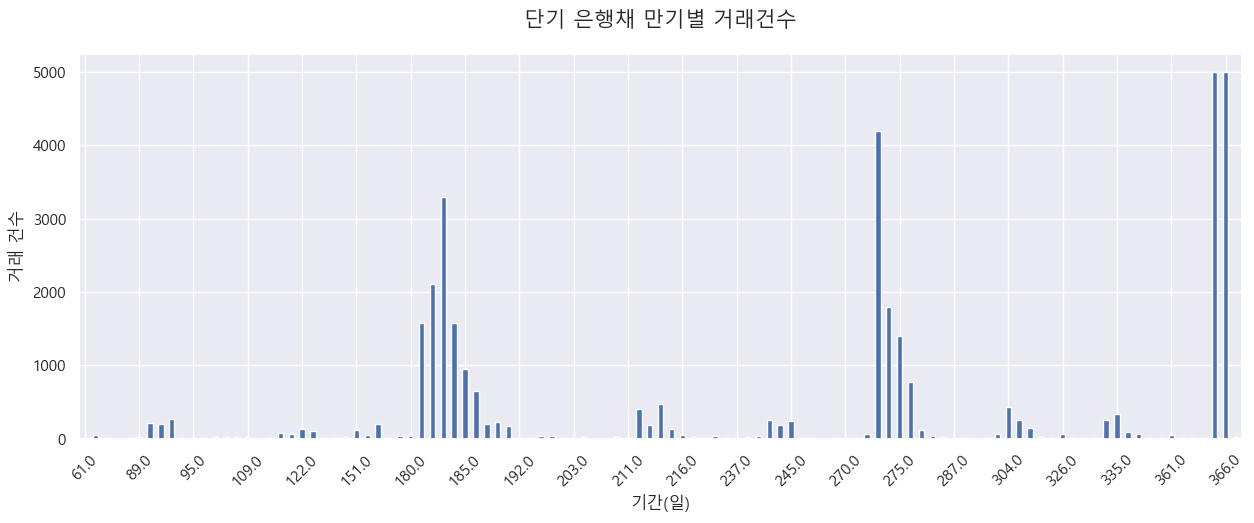

In [132]:
ax = merged[
     (merged["기간"] < 380) 
]["기간"].value_counts().sort_index()
print(ax.shape)

upper_limit = 5000
print(ax[ax>upper_limit])

ax = ax.apply(lambda x: min(x, upper_limit))

ax =ax.plot(kind="bar", figsize=(15, 5))

plt.title("단기 은행채 만기별 거래건수", pad=20, fontsize=15)
plt.xlabel("기간(일)")
plt.ylabel("거래 건수")
plt.xticks(rotation=45)


ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

In [406]:
55155/5000, 14029/5000

(11.031, 2.8058)

In [133]:
# When multiple conditions are satisfied, the first one encountered in condlist is used.
conditions = [merged["기간"] <= v+3 for v in [28, 91, 182, 273, 364]] # 통안증권 일수에 맞춰서 제작
# conditions = [merged["기간"] <= v*30 for v in [1, 3, 6, 9, 12]]
choices = ['1mo', '3mo', '6mo', '9mo', '12mo']
merged["term"] = np.select(conditions, choices, default='longer')

(107,)
기간
365.0    55155
366.0    14029
Name: count, dtype: int64


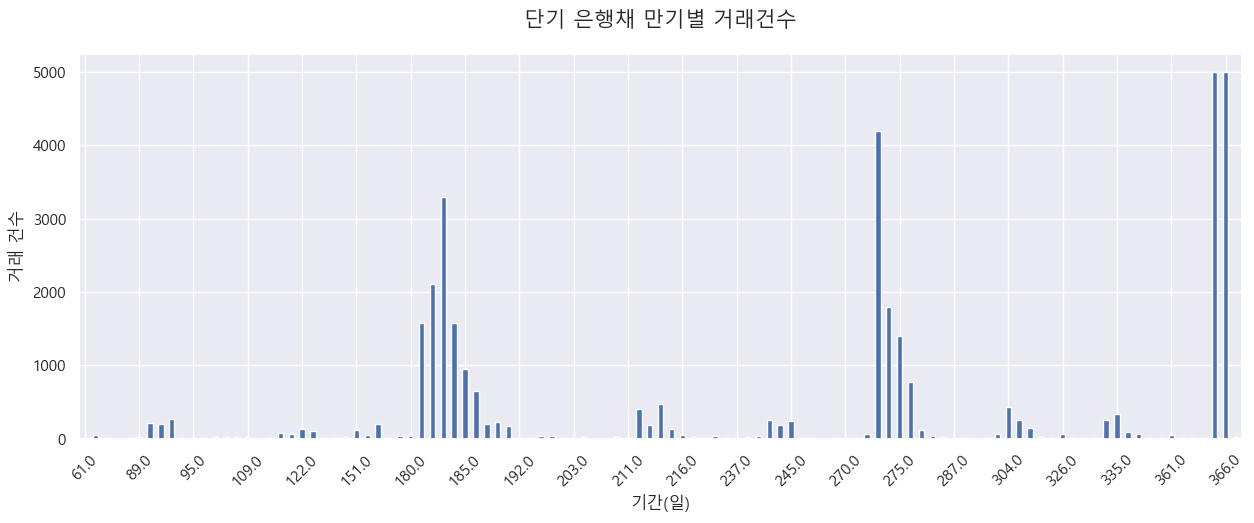

In [134]:
merged["발행일_년도"] = pd.to_datetime(merged["발행일"], format="%Y-%m-%d").dt.to_period("Y")
merged[(merged["기간"]>= 187) & (merged["기간"]<= 190)]["발행일_년도"].value_counts()

발행일_년도
2008    441
2007     98
2009     25
2011     20
2012     14
2005      8
Freq: Y-DEC, Name: count, dtype: int64

In [409]:
merg[
    (merg["term"] != "longer") & (merg["채권종류"]=="은행채")
].sort_values("기간")["기간"]

1542015     61.0
1069112     61.0
1071175     61.0
1071775     61.0
1080644     61.0
           ...  
945502     367.0
997175     367.0
915760     367.0
1027545    367.0
945019     367.0
Name: 기간, Length: 94190, dtype: float64

In [410]:
38251 / 94190 

0.4061046820256928

In [411]:
data = merg[
    (merg["term"] != "longer") & (merg["채권종류"]=="은행채")
].sort_values("기간").groupby(["monthly", "term"]).size().reset_index().rename(columns={0:"count"})
print(data["count"].sum())

data.head()

94190


,monthly,term,count
0,2006-01,12mo,438
1,2006-01,6mo,62
2,2006-01,9mo,12
3,2006-02,12mo,497
4,2006-02,6mo,104


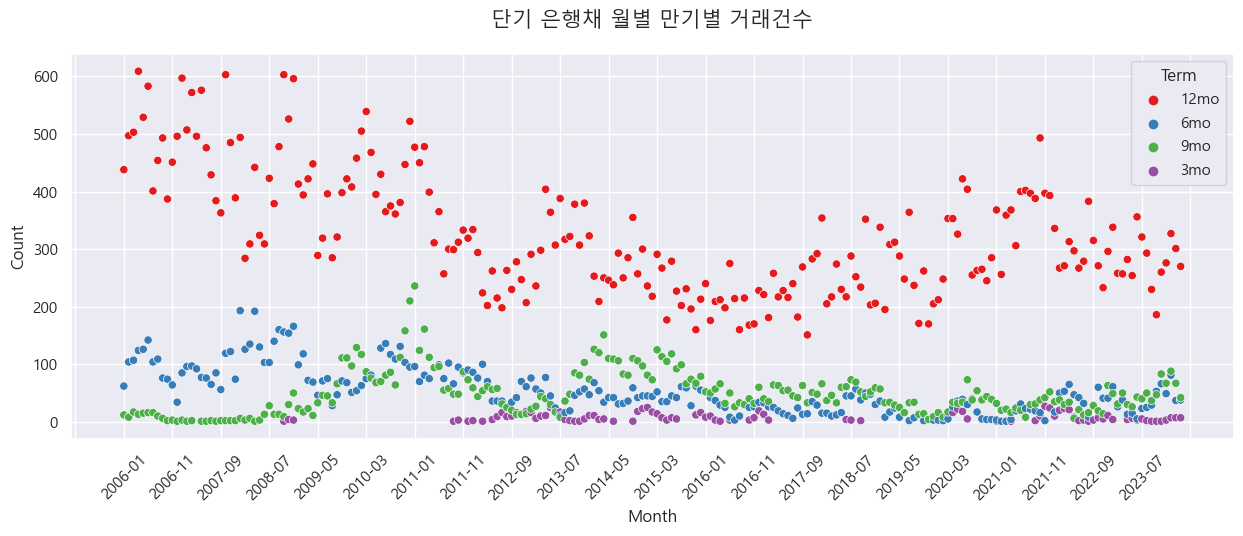

In [412]:
plt.figure(figsize=(15, 5))
data['monthly'] = data['monthly'].astype(str)
ax = sns.scatterplot(data=data, x='monthly', y='count', hue='term', palette='Set1')
plt.title('단기 은행채 월별 만기별 거래건수', fontsize=15, pad=20)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Term')
plt.xticks(rotation=45)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

38251


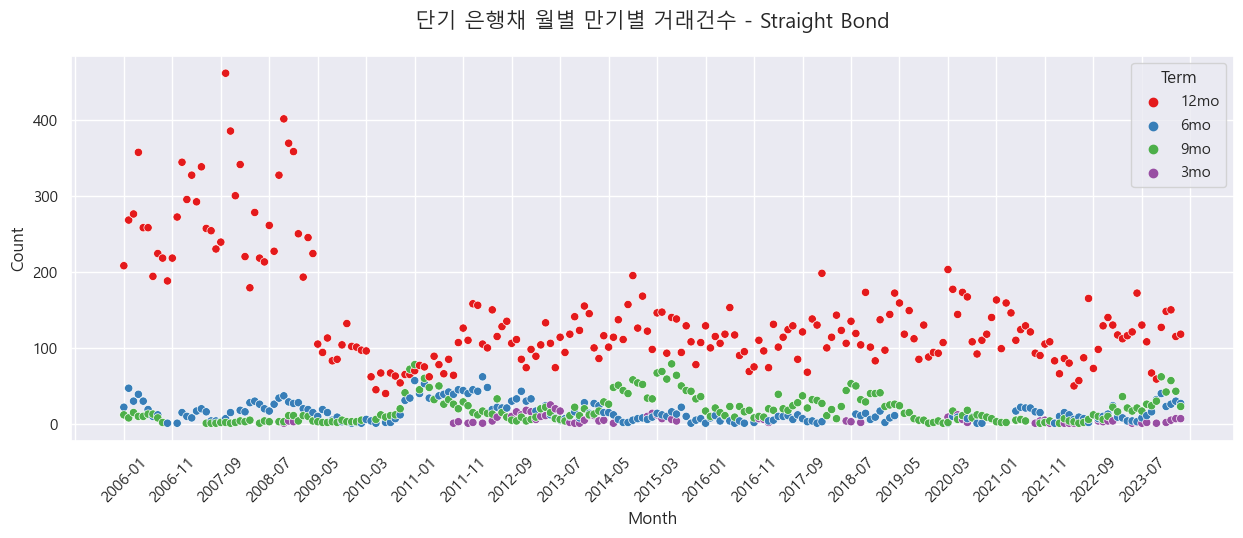

In [413]:
data = merg[
    (merg["term"] != "longer") & (merg["채권종류"]=="은행채") & (merg["flag"].isna()) 
].sort_values("기간").groupby(["monthly", "term"]).size().reset_index().rename(columns={0:"count"})
print(data["count"].sum())

plt.figure(figsize=(15, 5))
data['monthly'] = data['monthly'].astype(str)
ax = sns.scatterplot(data=data, x='monthly', y='count', hue='term', palette='Set1')
plt.title('단기 은행채 월별 만기별 거래건수 - Straight Bond', fontsize=15, pad=20)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Term')
plt.xticks(rotation=45)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

(218,)
   monthly term
0  2006-01  1mo
1  2006-01  3mo
2  2006-02  1mo
3  2006-02  3mo
4  2006-03  1mo


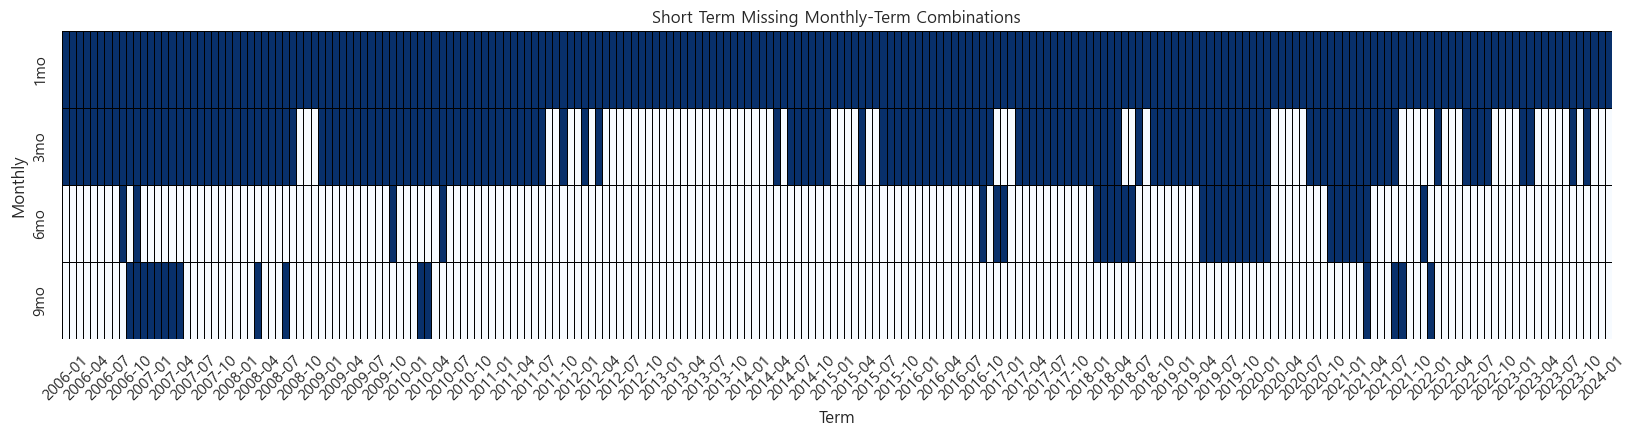

In [414]:
import seaborn as sns

all_monthly = pd.date_range(start=data["monthly"].min(), end=data["monthly"].max(), freq='ME').strftime('%Y-%m')  # 가능한 모든 monthly 값 생성
all_terms = choices 
print(all_monthly.shape)

all_combinations = pd.MultiIndex.from_product([all_monthly, all_terms], names=['monthly', 'term'])
missing_combinations = all_combinations.difference(
    data.set_index(['monthly', 'term']).index)
missing_df = pd.DataFrame(index=missing_combinations).reset_index()
print(missing_df.head())


heatmap_data = pd.crosstab(missing_df['monthly'], missing_df['term']).T
plt.figure(figsize=(20, 4)) 

sns.heatmap(heatmap_data, annot=False, cbar=False, cmap='Blues',linewidths=0.5, linecolor='black')

plt.title("Short Term Missing Monthly-Term Combinations")
plt.xlabel("Term")
plt.ylabel("Monthly")
plt.xticks(rotation=45)
plt.show()

15102


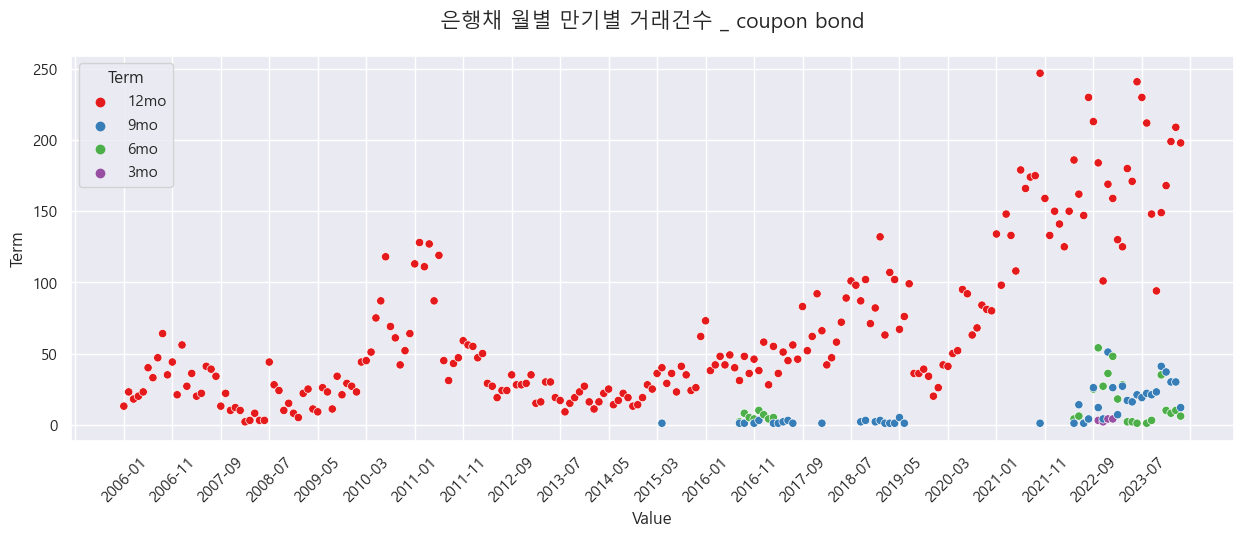

In [415]:
data = merg[
    (merg["term"] != "longer") & (merg["채권종류"]=="은행채") & (merg["이자지급유형"]=="이표채")
].sort_values("기간").groupby(["monthly", "term"]).size().reset_index().rename(columns={0:"count"})
print(data["count"].sum())

plt.figure(figsize=(15, 5))
data['monthly'] = data['monthly'].astype(str)
ax = sns.scatterplot(data=data, x='monthly', y='count', hue='term', palette='Set1')
plt.title('은행채 월별 만기별 거래건수 _ coupon bond', fontsize=15, pad=20)
plt.xlabel('Value')
plt.ylabel('Term')
plt.legend(title='Term')
plt.xticks(rotation=45)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

### Long Term

In [416]:
merg[(merg["채권종류"]=="은행채") & (merg["기간"]==360)]

,거래일,채권종류,종목명,표준코드,잔존기간,신용등급,평균수익률,평균단가(원),최고수익률,최저수익률,...,주관회사,등록기관,원리금지급기관,이자지급 선/후급,FRN 가산금리(%),FRN 금리(%),flag,_merge,monthly,term


In [417]:
# When multiple conditions are satisfied, the first one encountered in condlist is used.
merg["term"] = None
conditions = [merg["기간"] <= v+7 for v in [353, 730, 1095, 1460, 1825]] # 통안증권 일수에 맞춰서 제작
choices = ['shorter','1-2y', '2-3y', '3-4y', '4-5y']
merg["term"] = np.select(conditions, choices, default='longer')

In [418]:
1827 / 365

5.005479452054795

In [419]:
merg[
   (merg["term"] != "shorter") &  (merg["term"] != "longer") & (merg["채권종류"]=="은행채")
].sort_values("기간")["기간"]

1627412     361.0
1699063     361.0
1722943     361.0
1726166     361.0
1702392     361.0
            ...  
345440     1827.0
1526619    1827.0
1152662    1827.0
1153044    1827.0
1293225    1827.0
Name: 기간, Length: 215381, dtype: float64

(179,)
기간
365.0     12.256667
366.0      3.117556
546.0      1.117111
547.0      1.413778
548.0      1.284222
549.0      1.690000
730.0      5.525778
731.0      6.622222
1095.0     2.420444
1096.0     7.109778
1826.0     1.328000
Name: count, dtype: float64


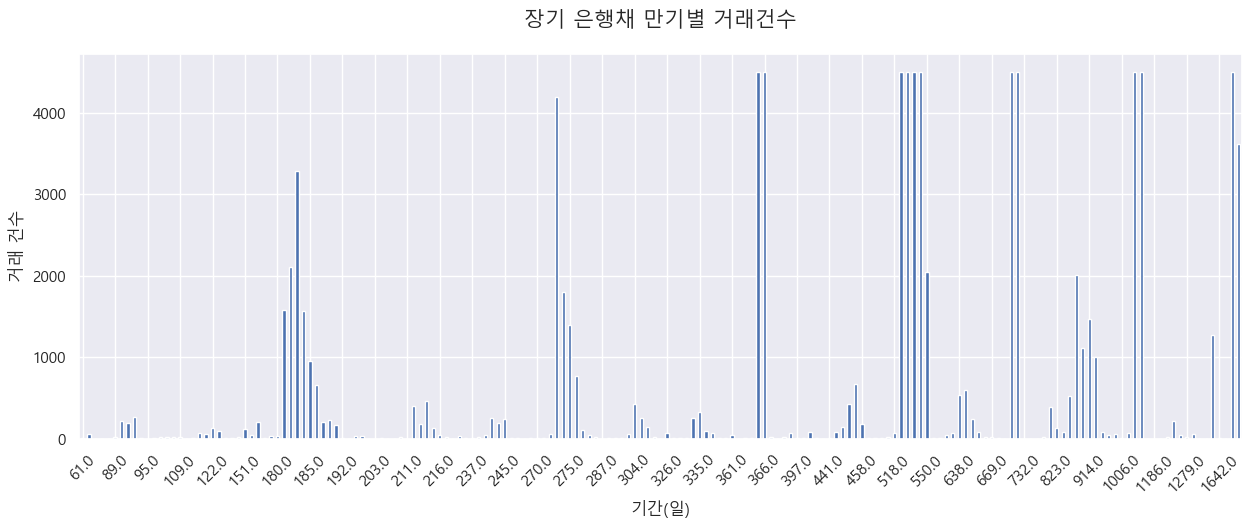

In [421]:
ax = merg[
     (merg["term"] != "longer") & (merg["채권종류"]=="은행채")
]["기간"].value_counts().sort_index()
print(ax.shape)

upper_limit = 4500
print(ax[ax>upper_limit] / upper_limit)

ax = ax.apply(lambda x: min(x, upper_limit))

ax =ax.plot(kind="bar", figsize=(15, 5))

plt.title("장기 은행채 만기별 거래건수", pad=20, fontsize=15)
plt.xlabel("기간(일)")
plt.ylabel("거래 건수")
plt.xticks(rotation=45)


ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

In [422]:
data = merg[
    (merg["term"] != "shorter") &  (merg["term"] != "longer") & (merg["채권종류"]=="은행채")
].sort_values("기간").groupby(["monthly", "term"]).size().reset_index().rename(columns={0:"count"})
print(data["count"].sum())

data.head()

215381


,monthly,term,count
0,2006-01,1-2y,611
1,2006-01,2-3y,104
2,2006-01,4-5y,23
3,2006-02,1-2y,691
4,2006-02,2-3y,99


In [423]:
merg[
    (merg["term"] != "shorter") &  (merg["term"] != "longer") & (merg["채권종류"]=="은행채") 
].shape

(215381, 51)

In [424]:
101182/215381

0.46978145704588614

101182


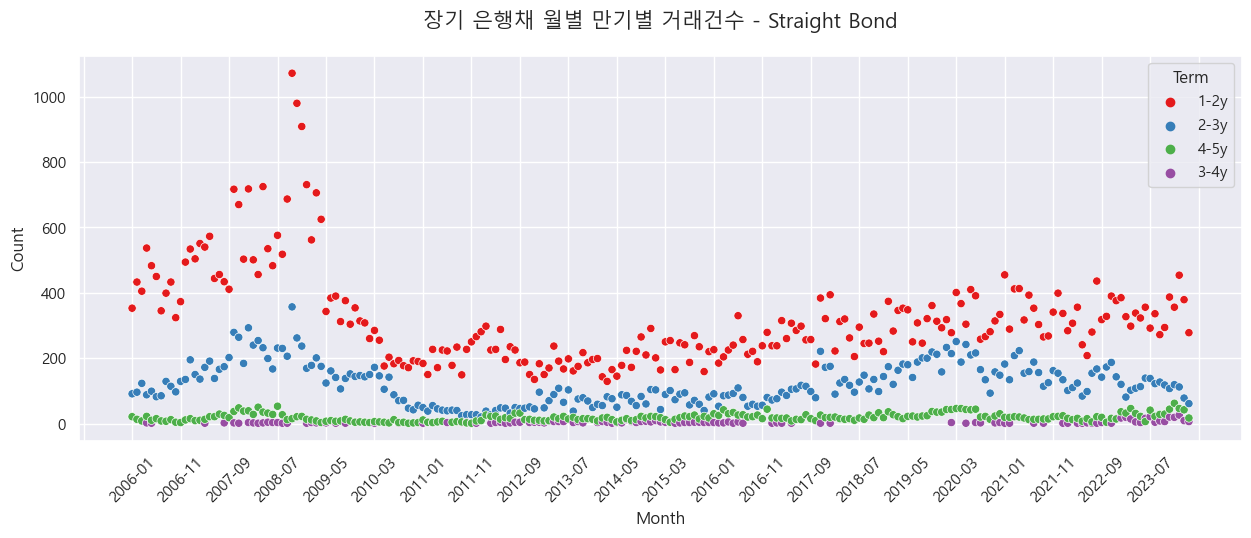

In [425]:
data = merg[
    (merg["term"] != "shorter") &  (merg["term"] != "longer") & (merg["채권종류"]=="은행채") & (merg["flag"].isna()) 
].sort_values("기간").groupby(["monthly", "term"]).size().reset_index().rename(columns={0:"count"})
print(data["count"].sum())

plt.figure(figsize=(15, 5))
data['monthly'] = data['monthly'].astype(str)
ax = sns.scatterplot(data=data, x='monthly', y='count', hue='term', palette='Set1')
plt.title('장기 은행채 월별 만기별 거래건수 - Straight Bond', fontsize=15, pad=20)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Term')
plt.xticks(rotation=45)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

(218,)
   monthly  term
0  2006-01  3-4y
1  2006-02  3-4y
2  2006-03  3-4y
3  2006-06  3-4y
4  2006-07  3-4y


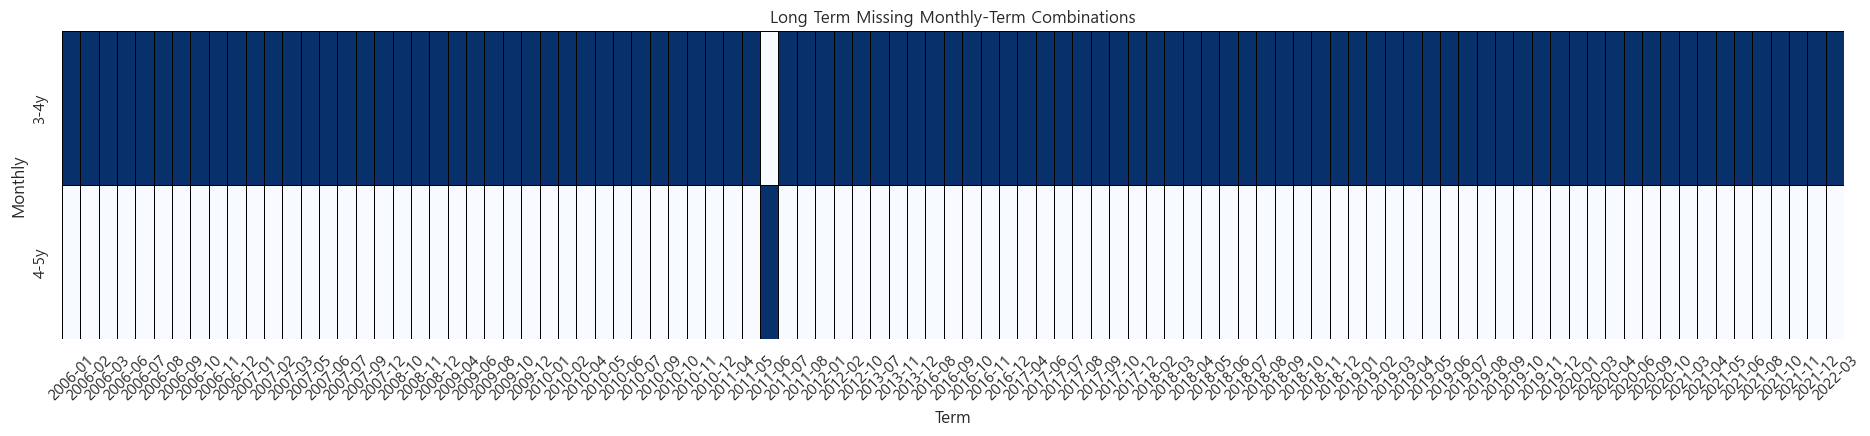

In [427]:
import seaborn as sns

all_monthly = pd.date_range(start=data["monthly"].min(), end=data["monthly"].max(), freq='ME').strftime('%Y-%m')  # 가능한 모든 monthly 값 생성

all_terms = choices[1:]
print(all_monthly.shape)

all_combinations = pd.MultiIndex.from_product([all_monthly, all_terms], names=['monthly', 'term'])
missing_combinations = all_combinations.difference(
    data.set_index(['monthly', 'term']).index)
missing_df = pd.DataFrame(index=missing_combinations).reset_index()
print(missing_df.head())


heatmap_data = pd.crosstab(missing_df['monthly'], missing_df['term']).T
plt.figure(figsize=(23, 4)) 

sns.heatmap(heatmap_data, annot=False, cbar=False, cmap='Blues',linewidths=0.5, linecolor='black')

plt.title("Long Term Missing Monthly-Term Combinations")
plt.xlabel("Term")
plt.ylabel("Monthly")
plt.xticks(rotation=45)
plt.show()